In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')  # Change the path if needed

# Display the first few rows of the dataset
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check for missing values
data.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)


In [7]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Convert the scaled data into a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Income', 'Spending'])


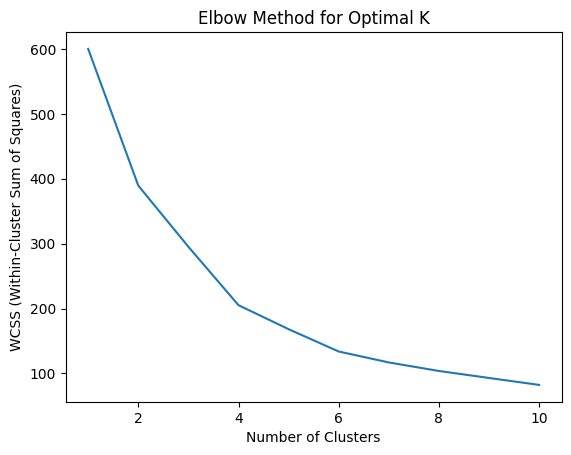

In [8]:
# Elbow method to find optimal K
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [9]:
# Apply K-Means with the chosen number of clusters (e.g., K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans

# Display the updated data with cluster labels
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


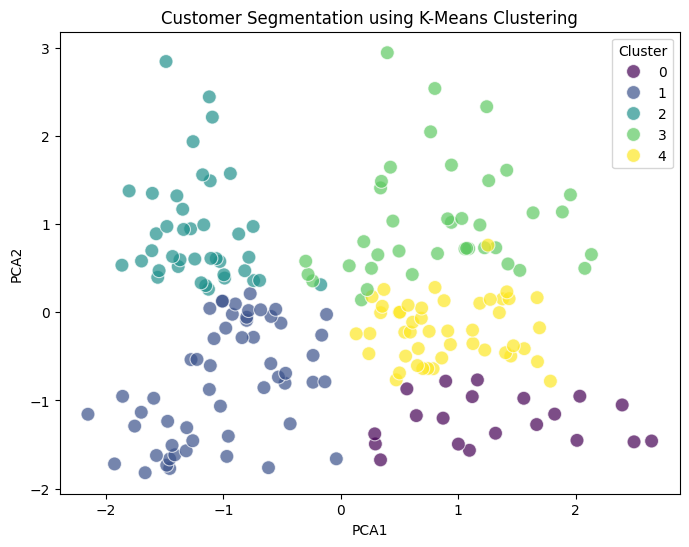

In [10]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()


In [12]:
# Evaluate using silhouette score
sil_score = silhouette_score(scaled_data, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.41664341513732767
